# SBA Guaranteed Loans - Appendix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
pd.options.display.max_columns = 500


In [2]:
#from google.colab import drive # We mount a Google Drive folder where the dataset is.
#drive.mount('/content/drive', force_remount=True)

#path = "/content/drive" + "/MyDrive" + "/Cursos/Coderhouse/Data Science/"
path = "./"

In [3]:
loans = pd.read_pickle(path + 'Should This Loan be Approved or Denied - After first contact.pkl') 

In [4]:
def describe_values(df, category_col, column_to_analyze):
  '''It does the same as df.groupby(category_col)[column_to_analyze].describe() but with more information'''

  #create a dataframe with specific columns

  df_info = pd.DataFrame(columns=['count', 'missing', 'unique_values', 'mean', 'std', 'mode', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis'])
  df_info.index.name = category_col # The name in the index appears in the name of the first column
  #loop of all the values that the category has
  for val in df[category_col].unique():

      # get info from column
      data_series = df[df[category_col]==val][column_to_analyze]
      # fill dataframe with initial columns
      df_info.loc[val] = [data_series.count(), data_series.isnull().sum(),  data_series.nunique(), data_series.mean(), data_series.std(), data_series.mode().iloc[0], data_series.min(), data_series.quantile(.25), data_series.quantile(.5), data_series.quantile(.75), data_series.max(), data_series.skew(), data_series.kurtosis()]

  return df_info

## More exploration

### Business subsector

Let's discuss creating a subsector column.

In [5]:
loans['Subsector'] = (loans['NAICS'].astype(str).str[2:3])#In the variables engineering section we are 
#going to analyze if it is useful to stay with the sector and sub-sector, or if it is better to stay only with 
#the sector.

You can see that the zeros in the 'NAICS' column translate to 0's for 'Sector' and empty strings for 'Subsector' (empty string is not the same as null). Also if there is a zero in 'Sector' it is because there was a zero in 'NAICS', and if there is a '' in 'Sector' it is because there was a zero in 'NAICS'.

In [6]:
#aux=loans[loans['NAICS']==0][['NAICS', 'Sector', 'Subsector']] #We create a
##auxiliay datataframe with the rows where NAICS column is equal to zero.
#print(aux.info())
##Them, there are 201948 zeros in NAICS.
#print(aux.head(5))
#print(aux['NAICS'].equals(aux['Sector'].astype(int)))
##We can't compare them directly
##because 'NAICS' is a int and 'Sector' is a string.)
##So, every zero in NAICS is a zero of Sector.
#print(loans[loans['Sector']=='0']['Sector'].count())
##There are 201948 zeroes in Sector, the same value that is in NAICS column. So, 
##there are not more zeroes in Sector than in NAICS.
#print(aux['Subsector'].isnull().sum()) 
##So, there are not nulls in Subsector.
#print((aux['Subsector']=='').sum()) #There are 201948 '' in Subsector. So the 
##zeroes in NAICS became '' in Subsector.
#print((loans[loans['Subsector']==''])['Subsector'].count())
##There are 201948 ''values in Subsector. So, #here are not more '' in Sector 
##than zeroes in NAICS.

Let's recall how the default rate is depending on the sector.

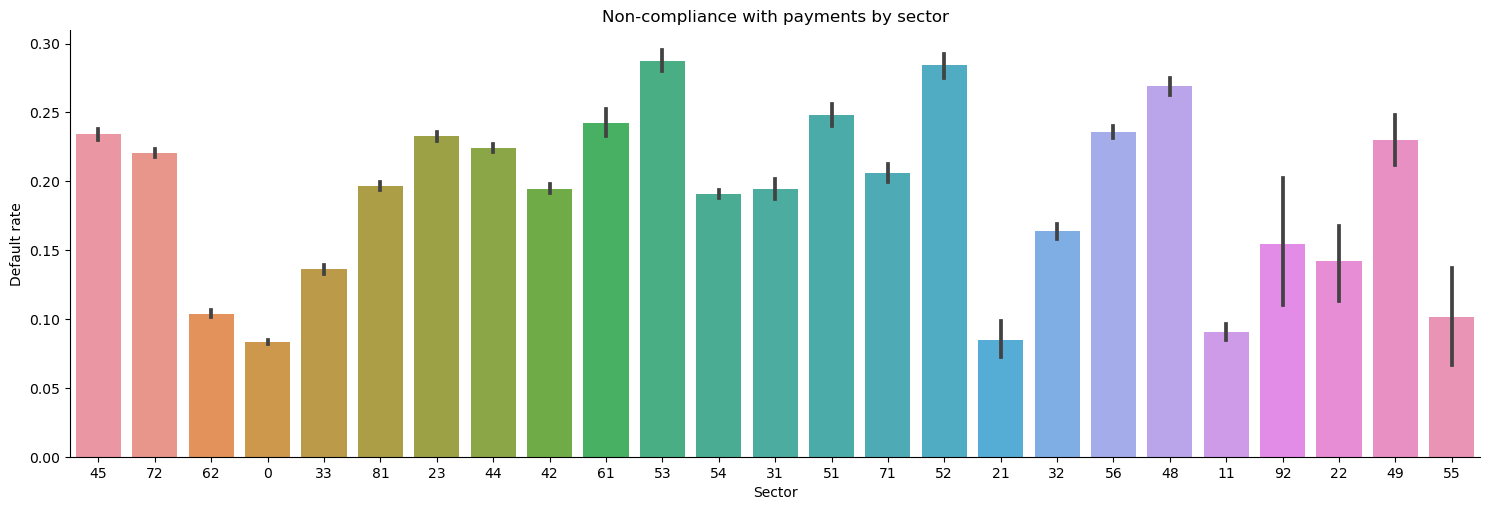

In [7]:
sns.catplot( data=loans, x="Sector", y="Default", kind="bar", aspect=3); # On the y-axis plots an average of Default. That is, the default ratio.
plt.title("Non-compliance with payments by sector");
plt.ylabel('Default rate');
plt.show()

We want to know if when considering the subsector we obtain additional information about the default rate

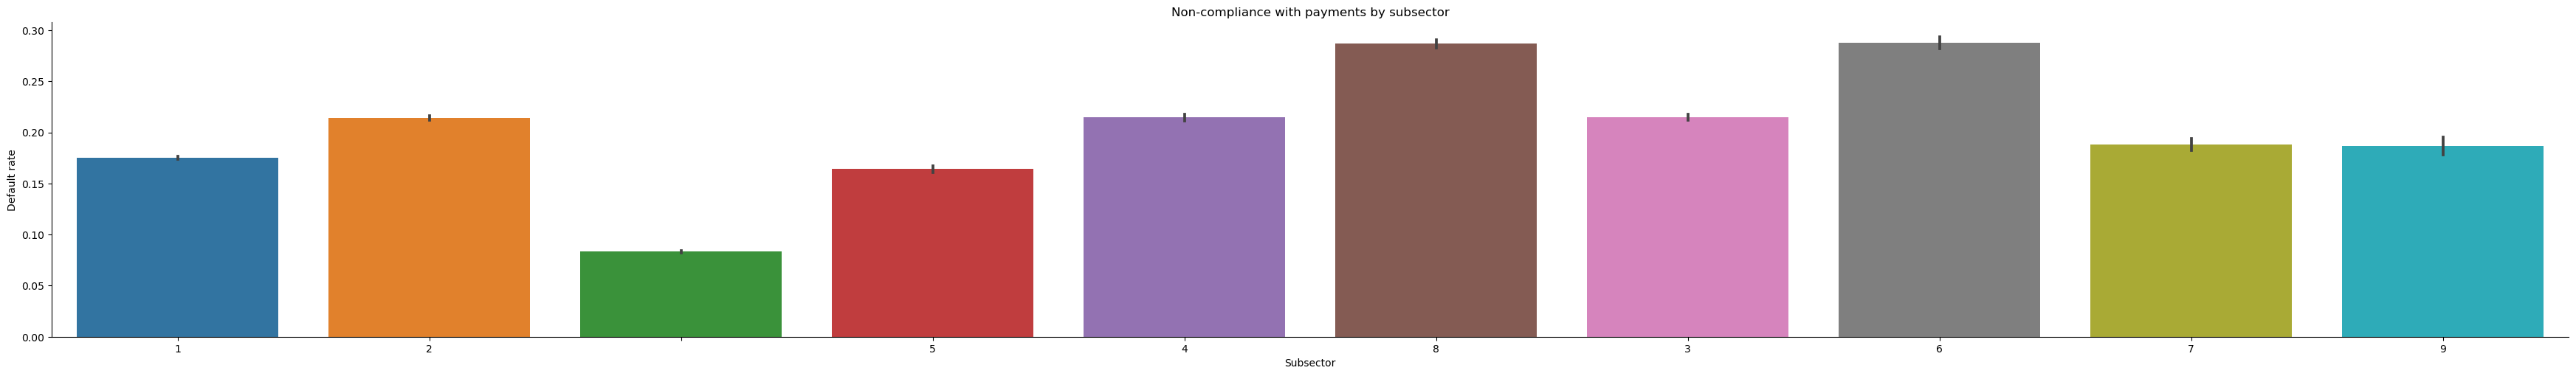

In [8]:
sns.catplot( data=loans, x="Subsector", y="Default", kind="bar", aspect=7); # On the y-axis plots an average
#of 'Default' field. That is, the default ratio.
plt.title("Non-compliance with payments by subsector");
plt.ylabel('Default rate');
plt.show()

Apparently it seems so. Let's look more in detail taking into account also the sector.

In [9]:
pivot_NAICS=loans.pivot_table(index='Sector', columns=['Subsector'], values=['Default'], aggfunc='mean', margins = True, margins_name='Total default rate')
pivot_NAICS

Default                                          \
Subsector                            1         2         3         4   
Sector                                                                 
0                   0.083305       NaN       NaN       NaN       NaN   
11                       NaN  0.086266  0.049013  0.125370  0.268487   
21                       NaN  0.061224  0.134216  0.065359       NaN   
22                       NaN  0.141994       NaN       NaN       NaN   
23                       NaN       NaN       NaN  0.125332  0.076393   
31                       NaN  0.176451  0.111338  0.157791  0.158367   
32                       NaN  0.182685  0.106115  0.202131  0.109145   
33                       NaN  0.112446  0.111999  0.110547  0.105315   
42                       NaN  0.078499  0.087224  0.291095  0.320243   
44                       NaN  0.199256  0.270302  0.246620  0.195326   
45                       NaN  0.199734  0.301056  0.256060  0.196550   
48                       NaN  0.244726  0.156863  0.127389  0.282701   
49                       NaN  0.215873  0.287136  0.110357       NaN   
51                       NaN  0.254198  0.229285  0.162963  0.220063   
52                       NaN       NaN  0.425000  0.286102  0.213929   
53                       NaN  0.362923  0.175075  0.088608       NaN   
54                       NaN  0.190774       NaN       NaN       NaN   
55                       NaN  0.101562       NaN       NaN       NaN   
56                       NaN  0.243212  0.128440       NaN       NaN   
61                       NaN  0.242462       NaN       NaN       NaN   
62                       NaN  0.093812  0.115538  0.107798  0.138915   
71                       NaN  0.299556  0.300752  0.183632       NaN   
72                       NaN  0.069133  0.242694       NaN       NaN   
81                       NaN  0.165224  0.232850  0.209571  0.085366   
92                       NaN  0.368421  0.170213  0.129032  0.067797   
Total default rate  0.083305  0.175120  0.214337  0.215052  0.214697   

                                                                      \
Subsector                  5         6         7         8         9   
Sector                                                                 
0                        NaN       NaN       NaN       NaN       NaN   
11                  0.097440       NaN       NaN       NaN       NaN   
21                       NaN       NaN       NaN       NaN       NaN   
22                       NaN       NaN       NaN       NaN       NaN   
23                  0.094450  0.383147  0.165874  0.301926       NaN   
31                  0.314682  0.218914       NaN       NaN       NaN   
32                  0.115454  0.138232  0.159464       NaN       NaN   
33                  0.111561  0.167544  0.193479       NaN  0.180054   
42                  0.316119       NaN       NaN       NaN       NaN   
44                  0.210902  0.216729  0.172618  0.272093       NaN   
45                       NaN       NaN       NaN       NaN       NaN   
48                  0.239856  0.235294  0.203593  0.259159       NaN   
49                       NaN       NaN       NaN       NaN       NaN   
51                  0.296651  0.383117  0.350000  0.196532  0.316623   
52                  0.232394       NaN       NaN       NaN       NaN   
53                       NaN       NaN       NaN       NaN       NaN   
54                       NaN       NaN       NaN       NaN       NaN   
55                       NaN       NaN       NaN       NaN       NaN   
56                       NaN       NaN       NaN       NaN       NaN   
61                       NaN       NaN       NaN       NaN       NaN   
62                       NaN       NaN       NaN       NaN       NaN   
71                       NaN       NaN       NaN       NaN       NaN   
72                       NaN       NaN       NaN       NaN       NaN   
81                       NaN       NaN       NaN       NaN  

The values that can be seen in the table are the default rates by sector and subsector. In the 'Total default rate' column we can see the default rate for each sector, and in the 'Total default rate' row we can see the default rate for each subsector. 

We wonder if all the places in the table have a reasonable number of records, in the sense that if there are very few, the percentage of default can be very random and unrepresentative. Let's see a table with the number of records in each sector and subsector.

In [10]:
loans.pivot_table(index='Sector', columns=['Subsector'], values=['Default'], aggfunc='count', margins = True, margins_name='Total values')

Default                                                 \
Subsector                      1         2        3        4        5   
Sector                                                                  
0             201657.0       NaN       NaN      NaN      NaN      NaN   
11                 NaN     881.0    4815.0   1013.0    879.0   1406.0   
21                 NaN      98.0     529.0   1224.0      NaN      NaN   
22                 NaN     662.0       NaN      NaN      NaN      NaN   
23                 NaN       NaN       NaN   4516.0   1741.0  19587.0   
31                 NaN    6132.0     979.0   1014.0   1004.0   2091.0   
32                 NaN    2726.0    1112.0   6006.0    339.0   2789.0   
33                 NaN    1165.0    9884.0   7481.0   4064.0   1730.0   
42                 NaN   14255.0    9573.0  14655.0   9549.0    639.0   
44                 NaN   11824.0    7647.0   5770.0   7403.0  21868.0   
45                 NaN   12767.0    3315.0  20296.0   6029.0      NaN   
48                 NaN     237.0      51.0    157.0  12897.0   2785.0   
49                 NaN     315.0    1306.0    589.0      NaN      NaN   
51                 NaN    2561.0    3524.0    675.0   1595.0    209.0   
52                 NaN       NaN    2640.0   1475.0   5212.0    142.0   
53                 NaN    8156.0    5352.0     79.0      NaN      NaN   
54                 NaN   67918.0       NaN      NaN      NaN      NaN   
55                 NaN     256.0       NaN      NaN      NaN      NaN   
56                 NaN   30348.0    2180.0      NaN      NaN      NaN   
61                 NaN    6401.0       NaN      NaN      NaN      NaN   
62                 NaN   41999.0     251.0   1308.0  11705.0      NaN   
71                 NaN    2704.0     133.0  11779.0      NaN      NaN   
72                 NaN    8650.0   58856.0      NaN      NaN      NaN   
81                 NaN   38469.0   33236.0    606.0     82.0      NaN   
92                 NaN      19.0      47.0     31.0     59.0      4.0   
Total values  201657.0  258543.0  145430.0  78674.0  62558.0  53250.0   

                                                              
Subsector           6        7        8       9 Total values  
Sector                                                        
0                 NaN      NaN      NaN     NaN       201657  
11                NaN      NaN      NaN     NaN         8994  
21                NaN      NaN      NaN     NaN         1851  
22                NaN      NaN      NaN     NaN          662  
23            11155.0   1893.0  27573.0     NaN        66465  
31              571.0      NaN      NaN     NaN        11791  
32             1946.0   2985.0      NaN     NaN        17903  
33             2280.0   4171.0      NaN  7420.0        38195  
42                NaN      NaN      NaN     NaN        48671  
44             6635.0   7786.0  15627.0     NaN        84560  
45                NaN      NaN      NaN     NaN        42407  
48               34.0    334.0   3685.0     NaN        20180  
49                NaN      NaN      NaN     NaN         2210  
51              154.0   1400.0    865.0   379.0        11362  
52                NaN      NaN      NaN     NaN         9469  
53                NaN      NaN      NaN     NaN        13587  
54                NaN      NaN      NaN     NaN        67918  
55                NaN      NaN      NaN     NaN          256  
56                NaN      NaN      NaN     NaN        32528  
61                NaN      NaN      NaN     NaN         6401  
62                NaN      NaN      NaN     NaN        55263  
71                NaN      NaN      NaN     NaN        14616  
72                NaN      NaN      NaN     NaN        67506  
81                NaN      NaN      NaN     NaN        72393  
92               30.0      1.0     36.0     NaN          227  
Total values  22805.0  18570.0  47786.0  7799.0       897072

Let's see some cases with very few records, for example in sector 92. But it is not the general rule. So in general, the default rates in the table above are not due to random fluctuations.

Let's see graphically how is the default rate for all sectors along with their subsectors.

In [11]:
pivot_NAICS_simple = pivot_NAICS['Default'] # We remove the multiindex to simplify.
pivot_NAICS_simple


Subsector,,1,2,3,4,5,6,7,8,9,Total default rate
Sector,,,,,,,,,,,
0,0.083305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083305
11,NaN,0.086266,0.049013,0.125370,0.268487,0.097440,NaN,NaN,NaN,NaN,0.090282
21,NaN,0.061224,0.134216,0.065359,NaN,NaN,NaN,NaN,NaN,NaN,0.084819
22,NaN,0.141994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141994
23,NaN,NaN,NaN,0.125332,0.076393,0.094450,0.383147,0.165874,0.301926,NaN,0.232634
31,NaN,0.176451,0.111338,0.157791,0.158367,0.314682,0.218914,NaN,NaN,NaN,0.194470
32,NaN,0.182685,0.106115,0.202131,0.109145,0.115454,0.138232,0.159464,NaN,NaN,0.163883
33,NaN,0.112446,0.111999,0.110547,0.105315,0.111561,0.167544,0.193479,NaN,0.180054,0.136431
42,NaN,0.078499,0.087224,0.291095,0.320243,0.316119,NaN,NaN,NaN,NaN,0.194777


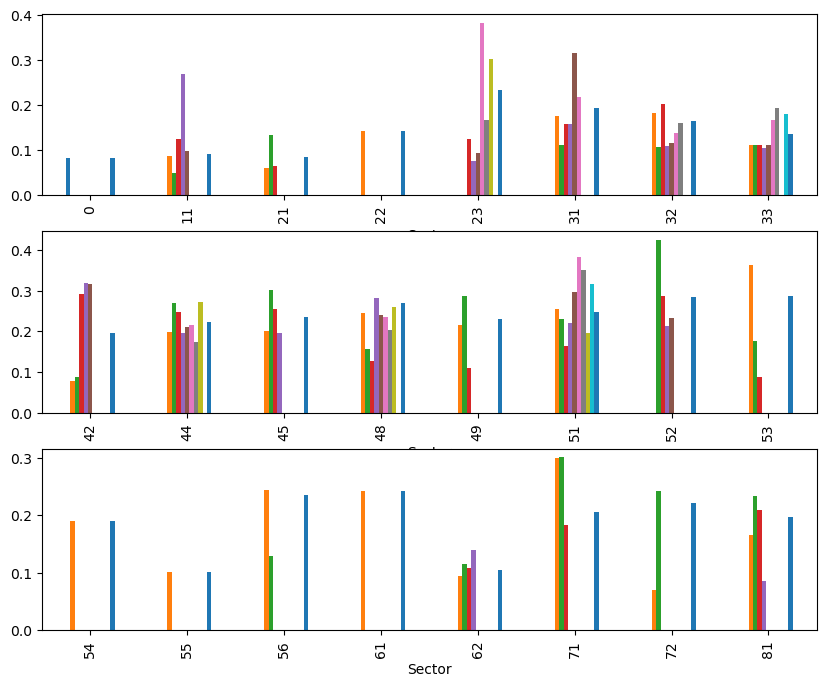

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=1)
pivot_NAICS_simple.iloc[0:8].plot.bar(figsize=(10,8), ax=ax[0],legend=None);
pivot_NAICS_simple.iloc[8:16].plot.bar(figsize=(10,8), ax=ax[1],legend=None);
pivot_NAICS_simple.iloc[16:24].plot.bar(figsize=(10,8), ax=ax[2],legend=None);
plt.show()

We see differences between subsectors, but these differences are not consistent for different sectors (for example, the default rate of subsector 2 is the highest in sector 52, but it is not in other sectors; similar things happen in general).

Therefore, we do not believe that adding the subsector field would enrich the model and therefore we will not take it into account in the model.

### Banks

An idea we can explore is this: In a way, the amount of a bank's loans is a measure of how important it is. Will the default rate depend on how important it is? Or in terms of our data, is there a correlation between the default rate and the number of loans each bank took out?

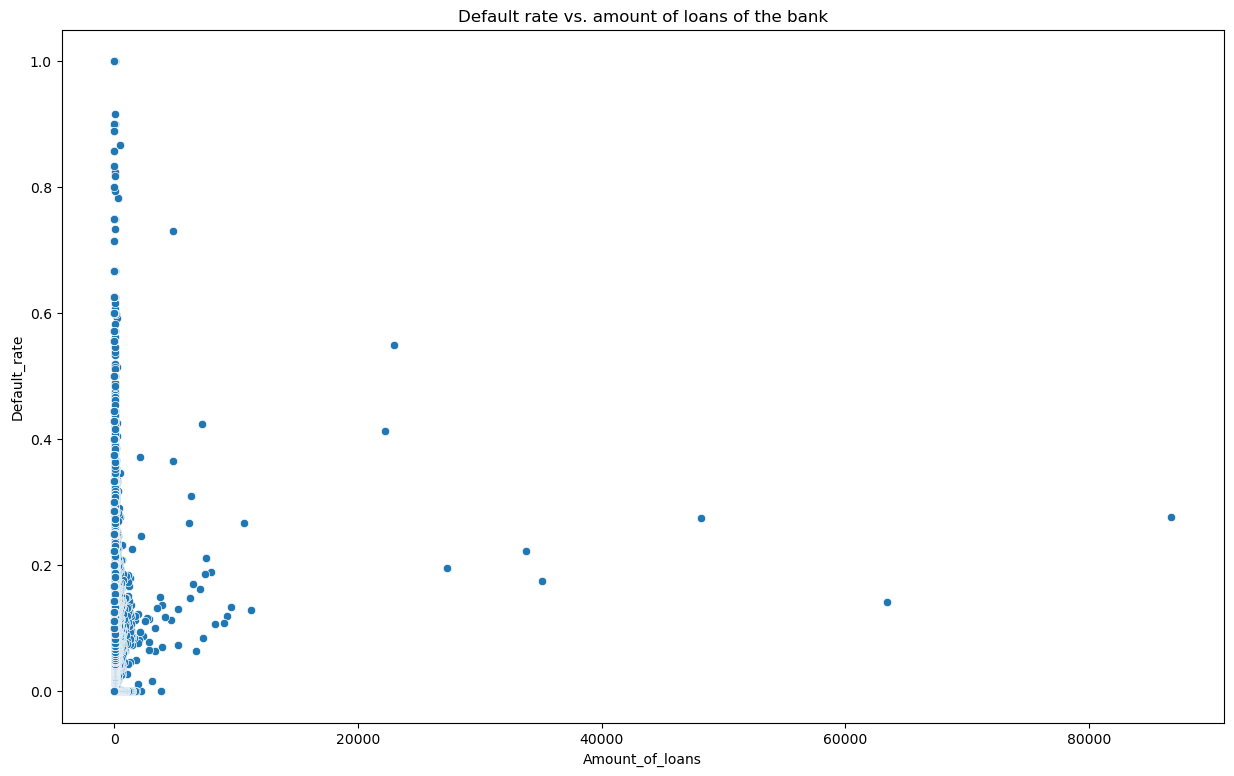

In [13]:
group_bank= loans.groupby(['Bank']).agg(Default_rate=('Default', 'mean'), Amount_of_loans=('Bank', 'count'), Average_disbursement_amount=('DisbursementGross', 'mean')).sort_values(by=['Amount_of_loans'], ascending=False)                                     
group_bank=group_bank.reset_index() # We put the bank as a column, creating a new index.

fig, ax = plt.subplots(figsize=(15, 9))
ax=sns.scatterplot(x=group_bank['Amount_of_loans'], y=group_bank['Default_rate']);
ax.set(xlabel='Amount_of_loans', ylabel='Default_rate',title = 'Default rate vs. amount of loans of the bank') ;
plt.show()

There doesn't seem to be much of a correlation. Let's limit the amount of loans to see if we can see something.

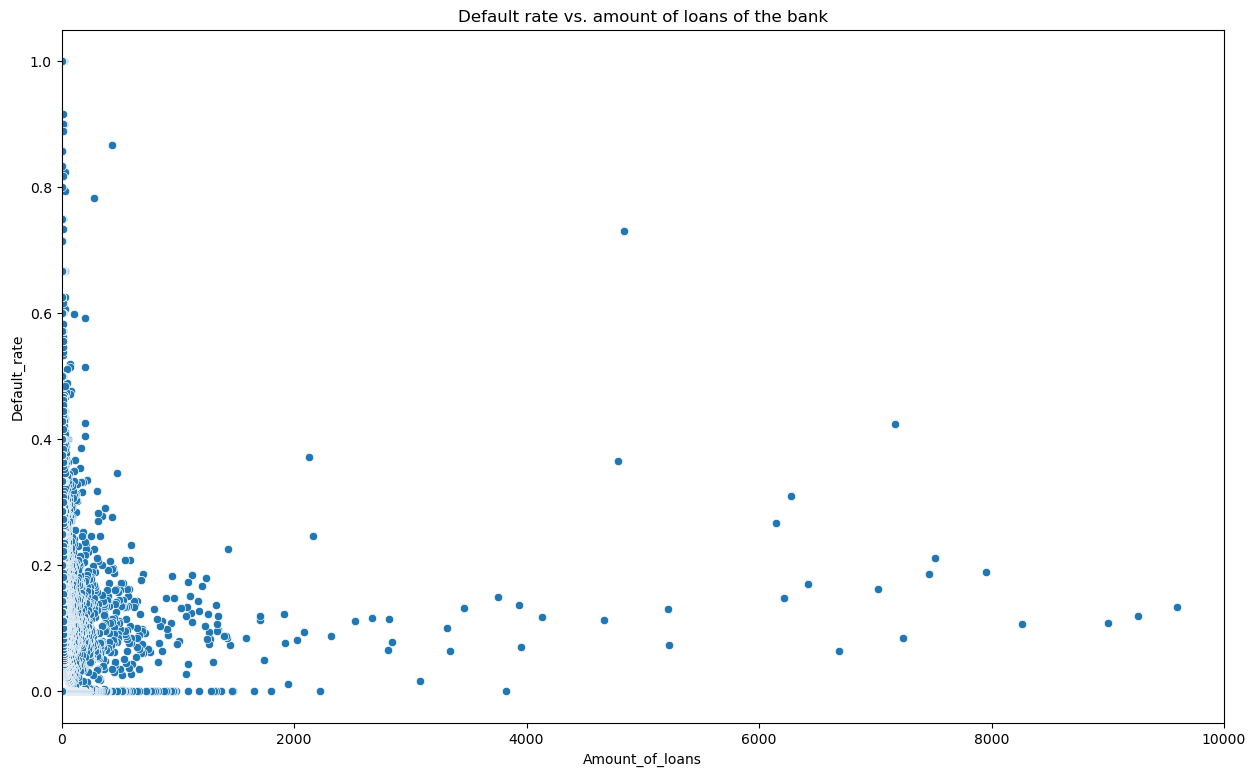

In [14]:
fig, ax = plt.subplots(figsize=(15, 9))
ax=sns.scatterplot(x=group_bank['Amount_of_loans'], y=group_bank['Default_rate']);
ax.set(xlabel='Amount_of_loans', ylabel='Default_rate',title = 'Default rate vs. amount of loans of the bank') ;
ax.set_xlim(0,10000);
plt.show()

You can't really tell much. If we look at it in more statistical terms, with the correlation coefficient:

In [15]:
group_bank['Amount_of_loans'].corr(group_bank['Default_rate'])

0.001468685919273037

We see that there is effectively no correlation, so this idea is not going to work for us. 

### States

One thing one might be tempted to do is look at banks by state where they are located. But it would be a mistake to look at things this way because the data we have (the 'BankState' field) is the state where the **branch** of the bank that made the loan is located. That is, each 'bank is in many states. For example:

In [16]:
loans[loans['Bank']=='BANK OF AMERICA NATL ASSOC'][['Bank', 'BankState']].head(15)

,Bank,BankState
11,BANK OF AMERICA NATL ASSOC,OR
15,BANK OF AMERICA NATL ASSOC,NC
17,BANK OF AMERICA NATL ASSOC,MD
22,BANK OF AMERICA NATL ASSOC,RI
26,BANK OF AMERICA NATL ASSOC,NC
45,BANK OF AMERICA NATL ASSOC,MA
51,BANK OF AMERICA NATL ASSOC,MA
53,BANK OF AMERICA NATL ASSOC,RI
66,BANK OF AMERICA NATL ASSOC,WA
73,BANK OF AMERICA NATL ASSOC,NC


So the idea of grouping banks by "their" state doesn't make sense.

#### How are the state of the company and that of the branch related to the default rate?



Here is the default rate table of State vs. BankState:

In [17]:
pivot_state=loans.pivot_table(index='State', columns=['BankState'], values=['Default'], aggfunc='mean', margins = True, margins_name='Total default rate')
print('Default rate:')
print(pivot_state)
print('----------------------------------------------------')
print('Number of loans:')
pivot_state=loans.pivot_table(index='State', columns=['BankState'], values=['Default'], aggfunc='count', margins = True, margins_name='Total counts')
print(pivot_state)

Default rate:
                     Default                                               \
BankState                 AK        AL   AN        AR        AZ        CA   
State                                                                       
AK                  0.077849       NaN  NaN  0.333333       NaN  0.444444   
AL                  1.000000  0.089157  NaN  0.111111  0.000000  0.538951   
AR                       NaN  0.216495  NaN  0.138959  0.000000  0.538462   
AZ                  1.000000  0.267574  NaN       NaN  0.059315  0.221585   
CA                  0.500000  0.511628  NaN  0.000000  0.155172  0.125979   
CO                  0.000000  0.382637  NaN  0.200000  0.157895  0.259858   
CT                       NaN  0.000000  NaN       NaN       NaN  0.211302   
DC                       NaN       NaN  NaN       NaN       NaN  0.484407   
DE                       NaN  0.000000  0.0  0.000000       NaN  0.500000   
FL                       NaN  0.144737  NaN  0.250000  1.00000

             Default                                                           \
BankState         AK       AL   AN      AR      AZ        CA       CO      CT   
State                                                                           
AK            1413.0      NaN  NaN     3.0     NaN     144.0      3.0     3.0   
AL               1.0   5395.0  NaN     9.0     1.0     629.0      4.0     5.0   
AR               NaN     97.0  NaN  4764.0     2.0     208.0      1.0     4.0   
AZ               3.0    441.0  NaN     NaN  3709.0    1918.0    185.0    81.0   
CA               2.0     43.0  NaN     2.0    58.0   76378.0   1997.0   127.0   
CO               1.0    311.0  NaN     5.0    19.0    1978.0   7618.0    17.0   
CT               NaN      3.0  NaN     NaN     NaN     407.0      1.0  5475.0   
DC               NaN      NaN  NaN     NaN     NaN     481.0      1.0    10.0   
DE               NaN      1.0  1.0     1.0     NaN     126.0      7.0     2.0   
FL               NaN    988.

Perhaps it is more useful to consider whether the state of the company is the same as the state of the branch bank or not.

In [18]:
loans['SameState']=loans['State'].eq(loans['BankState']) #We create a new field which indicates if both states are equal or not.


In [19]:
print(f"There are {loans[loans['SameState']==True]['Default'].count()} loans where the state of the company is equal \
to the state of the branch bank. The\n corresponding default rate in this case is: \
{loans[loans['SameState']==True]['Default'].mean()*100}%.")    
print(f"There are {loans[loans['SameState']==False]['Default'].count()} loans where the state of the company is \
different than the state of the branch bank. The\n corresponding default rate in this case is: \
{loans[loans['SameState']==False]['Default'].mean()*100}%.")

There are 473358 loans where the state of the company is equal to the state of the branch bank. The
 corresponding default rate in this case is: 10.516142116537589%.
There are 423714 loans where the state of the company is different than the state of the branch bank. The
 corresponding default rate in this case is: 25.436497259944208%.


The default rate when the state of the branch bank is different from that of the company is 2.5 times higher! This is definitely an important fact to keep in mind.

If we break down the state of the branch bank according to whether it is different from that of the company requesting the loan, we can see the following:

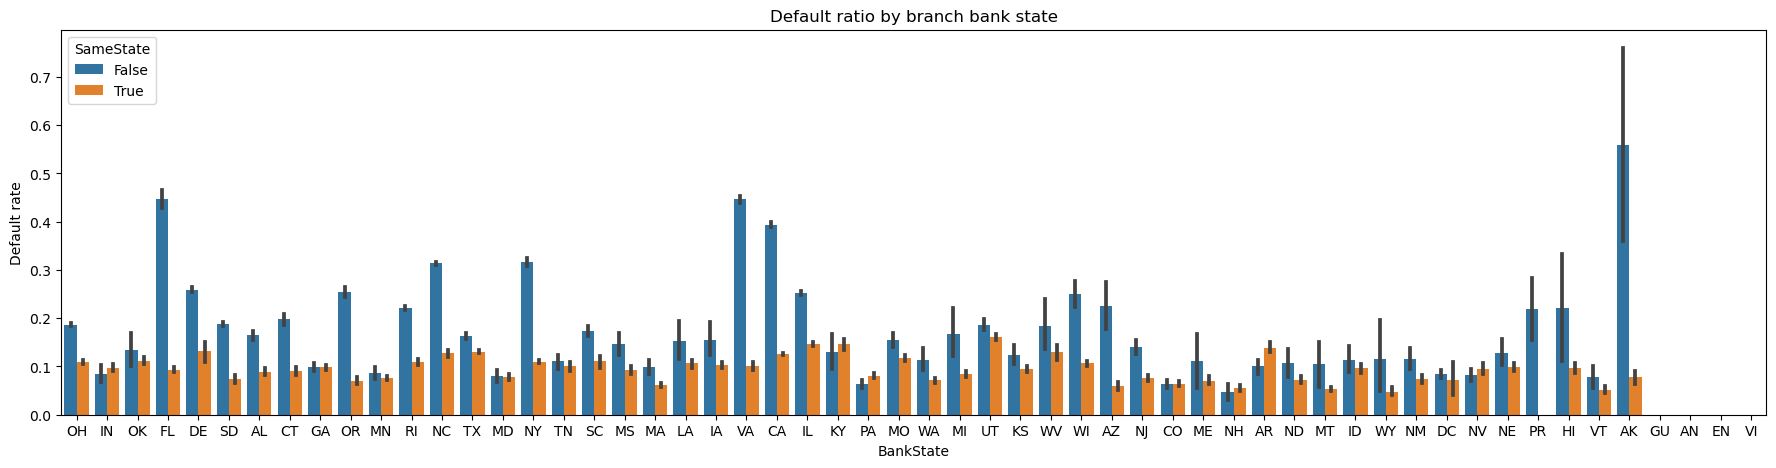

In [20]:
ax=sns.barplot(y='Default', x='BankState', data=loans, hue='SameState')
ax.figure.set_size_inches(22,5)
plt.ylabel('Default rate');
plt.title("Default ratio by branch bank state");
plt.show()
 

Here we see again the great difference that there is if the bank branch is in the same state or not. We notice that there are some states ('GU', 'AN', 'EN', 'VI') that do not have bars, but that is because they have very few loans and the default rate is not calculated:

In [21]:
loans['BankState'].value_counts()

CA    118014
NC     79449
IL     65855
OH     58425
SD     51065
TX     47758
RI     44115
NY     39544
VA     28959
DE     24520
MN     19950
UT     18994
PA     17036
WI     15402
MO     14840
MA     13843
GA     13805
FL     13803
AL     12127
OR     11369
WA     10687
CO     10580
CT      9905
IA      9860
NJ      9434
KS      8869
MT      7848
IN      7618
SC      7471
MI      7365
OK      7322
MD      6993
NH      6794
AR      6311
MS      5923
TN      5619
NE      5333
ND      5103
LA      5057
VT      4751
NM      4416
KY      4380
NV      4323
ID      4313
DC      4003
AZ      3957
ME      3689
HI      2989
WY      2167
WV      2006
AK      1438
PR       155
GU         5
AN         1
EN         1
VI         1
Name: BankState, dtype: int64

Continuing observing the graph above, we understand that it is more important if the state of the bank branch is equal to that of the company than the state of the branch itself.

### Companies with several loans

Let's analyze if the loans of recurring debtors have significant differences in the default rate.

               Default_rate  Number_of_loans
Several_loans                               
False              0.184293           706480
True               0.143542           190592


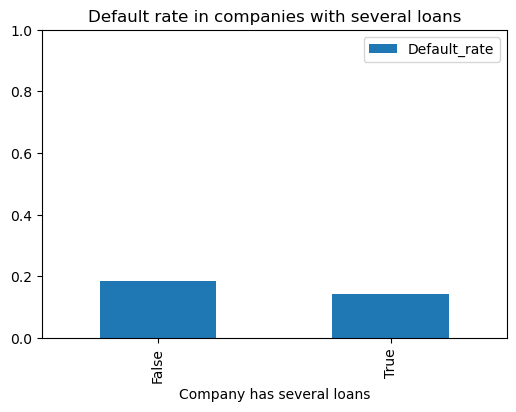

In [22]:
#We are going to create a new field called 'Several_loans', which will be True 
#if the company took several loans, and False if not.
loans['Several_loans']=loans['Name'].duplicated(keep=False)
print(loans.groupby(['Several_loans']).agg(Default_rate=('Default', 'mean'), Number_of_loans=('Default', 'count')))
g=loans.groupby(['Several_loans']).agg(Default_rate=('Default', 'mean'))
g.plot.bar(figsize=(6, 4))
plt.ylim((0,1));
plt.xlabel('Company has several loans')
plt.title('Default rate in companies with several loans') ;
plt.show()

We see there is not much difference between the companies that took several loans and those that did not. The difference is around 4%, and contrary to what one might think, companies that have taken out several loans are (slightly) more compliant. Does this difference allow us to infer that it is really more likely that the loans to companies that recur in debt are more likely to be repaid than the others? A hypothesis test can be done to see if this difference is statistically significant or simply a product of chance.

In [23]:
describe_values(loans, 'Several_loans', 'Default')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
Several_loans,,,,,,,,,,,,,
False,706480.0,0.0,2.0,0.184293,0.387723,0.0,0.0,0.0,0.0,0.0,1.0,1.628526,0.652098
True,190592.0,0.0,2.0,0.143542,0.350626,0.0,0.0,0.0,0.0,0.0,1.0,2.033287,2.134278


In [24]:
sample_0 = loans[loans['Several_loans']==True]['Default']
sample_1 = loans[loans['Several_loans']==False]['Default']
ttest,pval = ttest_ind(sample_0,sample_1)
print("p-value:",pval)
if pval <0.05:
  print("We reject null hypothesis.")
else:
  print("We accept null hypothesis.")
print("(The null hypothesis is that the two populations have the same real means).")

p-value: 0.0
We reject null hypothesis.
(The null hypothesis is that the two populations have the same real means).


This difference is not due to chance but is small and has a large standard deviation. We decided not to consider this field in the final model.

### Loan amounts differences

Since the 'GrAppv' field is the amount approved by the bank and 'SBA_Appv' is what the SBA would pay in the event of default, 'GrAppv' is always a number greater than or equal to 0. Let's create a field to analyze that difference.

In [25]:
loans['Ratio_approved-guaranteed']=loans['GrAppv']/loans['SBA_Appv']

In [26]:
loans.groupby(by='Default')['Ratio_approved-guaranteed'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,739515.0,1.473207,0.399202,1.0,1.176471,1.333333,2.0,35.536649
1,157557.0,1.651684,0.390864,1.0,1.176471,2.000000,2.0,8.203445


In [27]:
loans_with_high_ratio_approved_vs_guaranteed=loans[loans['Ratio_approved-guaranteed']>2]
loans_with_high_ratio_approved_vs_guaranteed[['Bank', 'ApprovalDate', 'Term', 'NoEmp', 'NewExist', 'RevLineCr',
                                             'LowDoc', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'Ratio_approved-guaranteed', 
                                             'Default']].sort_values(by='Ratio_approved-guaranteed', ascending=False).head(8)


,Bank,ApprovalDate,Term,NoEmp,NewExist,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv,Ratio_approved-guaranteed,Default
307242,"WACHOVIA SBA LENDING, INC.",1999-08-13,300,20,1.0,NaN,0.0,543000.0,543000.0,15280.0,35.536649,0
180131,FIRST BANK,1998-08-26,300,40,1.0,NaN,0.0,1747900.0,1747900.0,52437.0,33.333333,0
727494,CITIZENS BANK NATL ASSOC,2004-06-29,84,12,1.0,1.0,0.0,77691.0,50000.0,2500.0,20.000000,0
478711,"BUSINESS LOAN CENTER, LLC",2001-06-27,120,35,1.0,NaN,0.0,337000.0,337000.0,16850.0,20.000000,0
417685,WELLS FARGO BANK NATL ASSOC,2000-10-31,285,20,1.0,NaN,0.0,410000.0,410000.0,22960.0,17.857143,0
112268,BANK OF AMERICA NATL ASSOC,1998-02-04,120,1,1.0,0.0,0.0,290000.0,290000.0,20300.0,14.285714,0
881917,WELLS FARGO BANK NATL ASSOC,1996-09-27,84,9,1.0,0.0,0.0,52031.0,52031.0,4162.0,12.501442,0
124173,GREAT WESTERN BANK,1998-03-13,60,3,1.0,0.0,1.0,22000.0,22000.0,1760.0,12.500000,0


We see that in 75% the Ratio Disbusement-SBA_Guaranted ratio is 2 at most, however the remaining 25% have very high ratios, reaching a little over 35. Those high ratios seem to be due to a low value insured by the SBA.

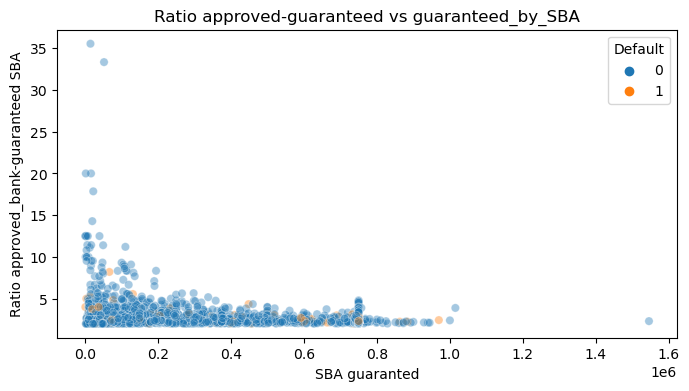

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(x=loans_with_high_ratio_approved_vs_guaranteed['SBA_Appv'], 
                y=loans_with_high_ratio_approved_vs_guaranteed['Ratio_approved-guaranteed'] ,
                hue=loans_with_high_ratio_approved_vs_guaranteed['Default'], alpha=0.4);
ax.set(xlabel='SBA guaranted', ylabel='Ratio approved_bank-guaranteed SBA', 
       title='Ratio approved-guaranteed vs guaranteed_by_SBA');
plt.show()

Indeed, we see that the loans with this high ratio are mostly for amounts less than 100,000 dollars.

Let's see if the loans that went into default present any particularity with that ratio.

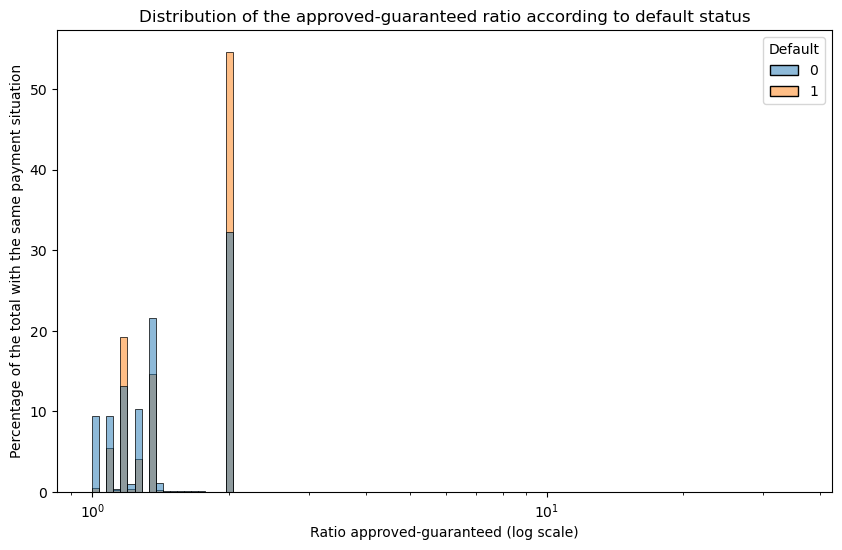

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=loans, x='Ratio_approved-guaranteed',log_scale=True, hue='Default', bins=100, stat="percent", 
             common_norm=False);
ax.set(xlabel='Ratio approved-guaranteed (log scale)', ylabel='Percentage of the total with the same payment situation', 
       title='Distribution of the approved-guaranteed ratio according to default status');
plt.show()

It is interesting that more than 50% of the loans that defaulted have this ratio around 2. That ratio equals 2 is the same as saying that half of the loan was guaranteed by the SBA. It seems that this portion is a standard that banks usually handle.

Furthermore, there is a difference in the ratio for the loans that defaulted and those that did not. However, we will not be able to use this ratio to predict because at the time of the evaluation of the granting of the loan by the SBA, the value that the bank would grant is not available. So we leave here the analysis with this field.

### Economic context

The percentage of loans with payment problems depends on the year of the loan, that is, on the political and economic context. But date variables cannot be used to make a predictive model because the only pre-loan variable is the loan approval date, and that variable alone tells us nothing a priori.

We are going to add variables that have to do with the economic context and that are based on data prior to the approval of the loan, with the aim of anticipating inconveniences. Let's try using the US inflation data and the SP 500 and Dow Jones indices. These data are public and it is not difficult to obtain them.

In [30]:
import datetime
import calendar

In [31]:
inflation_USA= pd.read_csv(path + "United States Inflation Rate monthly.csv", sep=';')

In [32]:
inflation_USA

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
108,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0


We are going to de-pivot this table, for this we first drop the annual average column, which we are not interested in.

In [33]:
inflation_USA.drop(['Ave'], axis=1, inplace=True)

In [34]:
inflation_USA=pd.melt(inflation_USA, id_vars=['Year'], var_name='Month', value_name='Annual Inflation Rate (%)')
inflation_USA

,Year,Month,Annual Inflation Rate (%)
0,1914,Jan,2.0
1,1915,Jan,1.0
2,1916,Jan,3.0
3,1917,Jan,12.5
4,1918,Jan,19.7
...,...,...,...
1315,2019,Dec,2.3
1316,2020,Dec,1.4
1317,2021,Dec,7.0
1318,2022,Dec,6.5


With a bit of manipulation we will leave the table in the way we want.

In [35]:
inflation_USA['Day']=inflation_USA.apply(lambda x: calendar.monthrange(x['Year'], 
                                    datetime.datetime.strptime(x['Month'], '%b').month)[1], axis=1) # Get the last
# day of each month. The command "datetime.datetime.strptime(x['Month'], '%b').month)[1]" transforms the month given 
#in letters to the number of the month

inflation_USA['Date'] = pd.to_datetime(inflation_USA[['Year', 'Month', 'Day']]
                            .astype(str).apply(' '.join, 1), format='%Y %b %d')
inflation_USA.drop(['Year', 'Month', 'Day'], inplace=True, axis=1)
inflation_USA = inflation_USA[['Date', 'Annual Inflation Rate (%)']]
inflation_USA=inflation_USA.sort_values(by='Date')
inflation_USA.set_index('Date', inplace=True)
inflation_USA

,Annual Inflation Rate (%)
Date,
1914-01-31,2.0
1914-02-28,1.0
1914-03-31,1.0
1914-04-30,0.0
1914-05-31,2.1
...,...
2023-08-31,NaN
2023-09-30,NaN
2023-10-31,NaN


Before attaching it to the dataframe, we are going to create rows for each date in the time range, repeating inflation values. We do this because if we join as is, only the loans that were made on the last day of the month will have inflation data.

In [36]:
inflation_USA=inflation_USA.asfreq('D')
inflation_USA.fillna(method='ffill', inplace=True)
inflation_USA.head(10)

,Annual Inflation Rate (%)
Date,
1914-01-31,2.0
1914-02-01,2.0
1914-02-02,2.0
1914-02-03,2.0
1914-02-04,2.0
1914-02-05,2.0
1914-02-06,2.0
1914-02-07,2.0
1914-02-08,2.0


In [37]:
dow_jones = pd.read_csv(path + "Dow Jones Industrial Average Historical Data.csv")
dow_jones.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,12/12/2017,24504.80,24452.96,24552.97,24443.83,342.22M,0.0049
1,12/11/2017,24386.03,24338.11,24389.72,24314.74,300.58M,0.0023
2,12/8/2017,24329.16,24263.26,24330.12,24225.50,293.59M,0.0049
3,12/7/2017,24211.48,24116.60,24262.88,24101.24,319.06M,0.0029
4,12/6/2017,24140.91,24157.85,24229.19,24134.49,312.72M,-0.0016
5,12/5/2017,24180.64,24335.01,24349.74,24155.28,371.19M,-0.0045
6,12/4/2017,24290.05,24424.11,24534.04,24288.19,424.25M,0.0024
7,12/1/2017,24231.59,24305.40,24322.06,23921.90,417.91M,-0.0017
8,11/30/2017,24272.35,24013.80,24327.82,24013.80,488.20M,0.0139
9,11/29/2017,23940.68,23883.26,23959.76,23872.59,401.41M,0.0044


In [38]:
dow_jones['Date'] = pd.to_datetime(dow_jones['Date']) #To join dataframes by columns, we need both columns to have the same format
dow_jones=dow_jones.set_index('Date') # For what we are going to do, it will be convenient for the date to be the index of the dataframe.

The data that we are going to use from this index for a given date is the variation of the index over a year up to the indicated date. In other words, given a date, we're going to look at the value of the index a year before that date, the value on that date, and we're going to calculate that ratio. To do this, we are going to create a function:

In [39]:
def dj_variation(final_date):
  ''' Returns the change in the Dow Jones index at the final date with respect to the date one year ago'''
  ideal_initial_date = final_date - datetime.timedelta(days=180) # If you take exactly one year, that day is 
    #likely to be a weekend. This line searches for the nearest business day
  #initial_date = dow_jones.index[dow_jones.index.get_loc(ideal_initial_date , method='nearest')] #Old syntax, 
        # it will be deprecated.
  initial_date = dow_jones.index[dow_jones.index.get_indexer([ideal_initial_date], method='nearest')[0]]
  return ((dow_jones.loc[final_date]['Price']/dow_jones.loc[initial_date]['Price'])-1)*100


dow_jones['dow_jones_last_year_variation (%)']=dow_jones.index.map(lambda element : dj_variation(element))

In [40]:
dow_jones.tail(30) # We start with the bottom of the table to show what happens to older records.

,Price,Open,High,Low,Vol.,Change %,dow_jones_last_year_variation (%)
Date,,,,,,,
1980-02-05,876.62,875.09,880.89,868.17,NaN,0.0017,4.463988
1980-02-04,875.09,881.48,887.38,870.48,NaN,-0.0072,4.281663
1980-02-01,881.48,875.84,884.64,866.30,NaN,0.0064,5.043138
1980-01-31,875.85,881.91,897.88,873.05,NaN,-0.0069,4.372229
1980-01-30,881.91,874.41,886.09,870.14,NaN,0.0086,5.094380
1980-01-29,874.40,878.50,885.67,864.59,NaN,-0.0047,4.199438
1980-01-28,878.50,876.11,884.56,866.64,NaN,0.0027,4.688021
1980-01-25,876.11,879.95,882.25,869.03,NaN,-0.0044,4.403213
1980-01-24,879.95,877.56,891.38,874.16,NaN,0.0027,4.860813


Since there are no dates before December 25, 1979, what you see in the table within a year of that date is cumulative growth.

From the Dow Jones table, we are only going to use the annual variation column. So we create a new Pandas Series from that column.

In [41]:
dow_jones_short = dow_jones['dow_jones_last_year_variation (%)']

In [42]:
dow_jones_short.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 9579 entries, 2017-12-12 to 1979-12-25
Series name: dow_jones_last_year_variation (%)
Non-Null Count  Dtype  
--------------  -----  
9579 non-null   float64
dtypes: float64(1)
memory usage: 407.7 KB


Dow Jones data is for the date range 1979-12-25 to 2017-12-12. Outside of those ranges, we will not have data on the variation.

In [43]:
sp500 = pd.read_csv(path + "S_P 500 Historical Data.csv")

sp500.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,1/24/2019,2642.33,2638.84,2647.2,2627.01,NaN,0.0014
1,1/23/2019,2638.7,2643.48,2653.19,2612.86,NaN,0.0022
2,1/22/2019,2632.9,2657.88,2657.88,2617.27,NaN,-0.0142
3,1/18/2019,2670.71,2651.27,2675.47,2647.58,NaN,0.0132
4,1/17/2019,2635.96,2609.28,2645.06,2606.36,NaN,0.0076
5,1/16/2019,2616.1,2614.75,2625.76,2612.68,NaN,0.0022
6,1/15/2019,2610.3,2585.1,2613.08,2585.1,NaN,0.0107
7,1/14/2019,2582.61,2580.31,2589.32,2570.41,NaN,-0.0053
8,1/11/2019,2596.26,2588.11,2596.27,2577.4,NaN,-0.0001
9,1/10/2019,2596.64,2573.51,2597.82,2562.02,NaN,0.0045


With the SP 500 index we do the same.

In [44]:
sp500['Date'] = pd.to_datetime(sp500['Date']) #To join dataframes by columns, we need both columns to have the same format
sp500=sp500.set_index('Date')


In [45]:
def sp500_variation(final_date):
  ''' Returns the change in the SP500 index at the final date with respect to the date one year ago'''
  ideal_initial_date = final_date - datetime.timedelta(days=180) # If you take exactly one year, that day is likely to be a weekend. This line searches for the nearest business day
  #initial_date = sp500.index[sp500.index.get_loc(ideal_initial_date , method='nearest')] # Old syntax, it will be 
#deprecated.
  initial_date = sp500.index[sp500.index.get_indexer([ideal_initial_date], method='nearest')[0]]
  return ((sp500.loc[final_date]['Price']/sp500.loc[initial_date]['Price'])-1)*100

In [46]:
sp500['Price'].sample(50)

Date
1986-09-25       231.8
1997-08-07       951.2
2009-06-23       895.1
1995-04-04       505.2
1983-03-23       152.8
2003-03-25       874.7
1993-05-28       450.2
1994-03-11       466.4
1999-07-22        1361
1995-03-13       490.1
2019-01-09     2584.96
1993-11-02       468.4
2018-06-27     2699.63
1984-11-20       164.2
1982-07-26       110.4
2015-11-05     2099.93
2002-04-23        1101
1994-10-06       452.4
1991-08-14       389.9
2018-06-22     2754.88
1989-09-22       347.1
2015-02-26     2110.74
2013-08-30     1632.97
1987-06-18       305.7
2010-10-15     1176.19
1985-06-12       187.6
1997-06-05       843.4
2004-08-03      1099.7
1983-12-05       165.8
2005-05-25        1190
1998-01-13       952.1
1982-10-20       139.2
2009-10-01     1029.85
1991-10-23       387.9
2002-03-21      1153.6
1998-09-30    1,017.00
1998-10-06       984.6
2009-08-31     1020.62
2017-02-28     2363.64
1983-02-03       144.3
2015-03-24      2091.5
1986-01-03       210.9
2000-05-17      1447.8
1995-0

In [47]:
sp500['Price'] = (sp500['Price']).replace({"[\$]": "", "[,]": ""}, regex=True)  # It turns out that the price field 
# is a string, some rows have ',' as thousands separator. So we have to transform it to float so that there are no 
# problems with sp500_variation.
sp500['Price']=pd.to_numeric(sp500['Price'])

In [48]:
sp500['sp500_last_year_variation (%)']=sp500.index.map(lambda element : sp500_variation(element))

In [49]:
sp500.tail(30) # We start with the bottom of the table to show what happens to the older records.

,Price,Open,High,Low,Vol.,Change %,sp500_last_year_variation (%)
Date,,,,,,,
1980-02-05,114.7,114.7,115.2,112.2,NaN,0.26%,6.400742
1980-02-04,114.4,114.4,116,113.8,NaN,-0.61%,6.122449
1980-02-01,115.1,115.1,115.5,113.1,NaN,0.79%,6.771800
1980-01-31,114.2,114.2,117.2,113.8,NaN,-0.87%,5.936920
1980-01-30,115.2,115.2,115.8,113.4,NaN,0.96%,6.864564
1980-01-29,114.1,114.1,115.8,113,NaN,-0.61%,5.844156
1980-01-28,114.8,114.8,115.7,112.9,NaN,1.06%,6.493506
1980-01-25,113.6,113.6,114.4,112.4,NaN,-0.09%,5.380334
1980-01-24,113.7,113.7,115.3,112.9,NaN,0.26%,5.473098


In [50]:
sp500_short = sp500['sp500_last_year_variation (%)']

In [51]:
sp500_short.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 9858 entries, 2019-01-24 to 1979-12-26
Series name: sp500_last_year_variation (%)
Non-Null Count  Dtype  
--------------  -----  
9858 non-null   float64
dtypes: float64(1)
memory usage: 412.1 KB


S&P 500 data is for the date range 1979-12-26 to 2019-01-24. Outside of those ranges, we will not have data on the variation.

In the case of inflation, it is not necessary to calculate the change between one year ago because the inflation index that is in the table is precisely the accumulated inflation of one year. But now we have the problem that we only have inflation on the last day of each year and on no other day. This is not going to cause us serious problems for an approximate analysis, although we are going to have a lot of null data in the inflation column that we are going to have to fill in later if we see that this data is useful and we want to do a more refined analysis.

Now, we are going to put together all the data that we are interested in in the loans data frame.

In [52]:
loans = pd.merge(loans, dow_jones_short, left_on = 'ApprovalDate', right_index=True, how='left')
loans = pd.merge(loans, sp500_short, left_on = 'ApprovalDate', right_index=True, how='left')
loans = pd.merge(loans, inflation_USA, left_on = 'ApprovalDate', right_index=True, how='left')

In [53]:
loans[['ApprovalDate', 'dow_jones_last_year_variation (%)', 'sp500_last_year_variation (%)', 'Annual Inflation Rate (%)']].sort_values(by='ApprovalDate')

,ApprovalDate,dow_jones_last_year_variation (%),sp500_last_year_variation (%),Annual Inflation Rate (%)
49244,1966-05-18,NaN,NaN,2.9
697801,1968-02-09,NaN,NaN,3.6
732056,1968-09-24,NaN,NaN,4.5
720402,1968-12-03,NaN,NaN,4.7
726149,1969-04-28,NaN,NaN,5.2
...,...,...,...,...
673911,2014-06-12,6.212679,8.718992,2.1
674448,2014-06-18,4.225844,7.625720,2.1
674606,2014-06-19,4.317329,7.763210,2.1
674907,2014-06-23,2.775384,6.546617,2.1


Unfortunately, we do not have data on the sp500 and dowjones in the entire period of years.

Let's do some graphs to see if stock market indices and inflation have an impact on loan repayment difficulty.

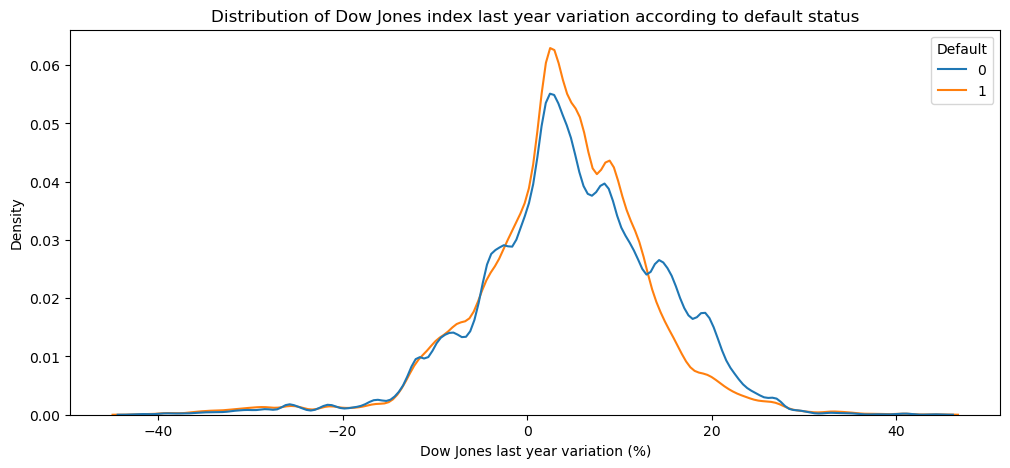

In [54]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.kdeplot(data=loans, x="dow_jones_last_year_variation (%)", hue="Default", multiple="layer", common_norm=False,
            ax=ax);
ax.set(xlabel='Dow Jones last year variation (%)', 
       title='Distribution of Dow Jones index last year variation according to default status');
plt.show()

In [55]:
describe_values(loans, 'Default','dow_jones_last_year_variation (%)')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
Default,,,,,,,,,,,,,
0,732800.0,6715.0,8105.0,4.741237,9.764262,6.888768,-42.428202,-0.784513,4.532932,11.052702,44.206475,-0.414399,1.213205
1,154834.0,2723.0,7608.0,3.650368,9.187602,14.174008,-42.428202,-0.973412,3.882243,9.219528,44.206475,-0.558527,2.401403


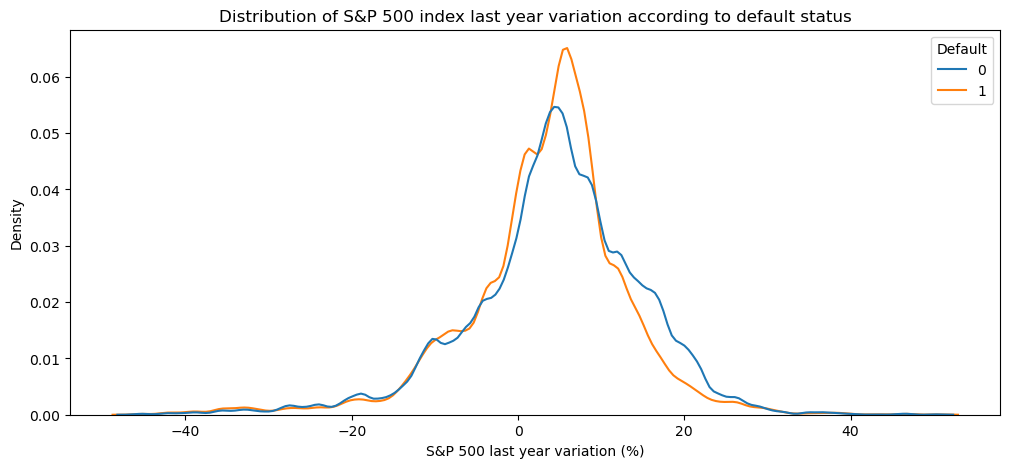

In [56]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.kdeplot(data=loans, x="sp500_last_year_variation (%)", hue="Default", multiple="layer", common_norm=False, ax=ax);
ax.set(xlabel='S&P 500 last year variation (%)',  
       title='Distribution of S&P 500 index last year variation according to default status');
plt.show()

In [57]:
describe_values(loans, 'Default','sp500_last_year_variation (%)')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
Default,,,,,,,,,,,,,
0,732800.0,6715.0,8065.0,4.479933,10.375094,3.192729,-46.096751,-0.620128,4.950671,10.910758,50.23724,-0.598333,1.770249
1,154834.0,2723.0,7547.0,3.408217,9.729082,15.089540,-46.096751,-0.828743,4.557689,8.573047,50.23724,-0.754549,3.054955


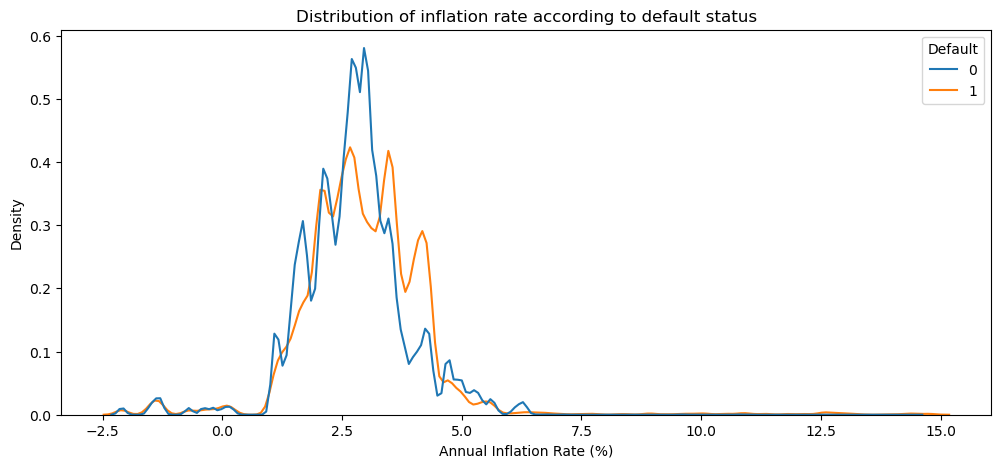

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.kdeplot(data=loans, x="Annual Inflation Rate (%)", hue="Default", multiple="layer", common_norm=False, ax=ax);
ax.set(title='Distribution of inflation rate according to default status');
plt.show()

In [59]:
describe_values(loans, 'Default', 'Annual Inflation Rate (%)')

,count,missing,unique_values,mean,std,mode,min,25%,50%,75%,max,skew,kurtosis
Default,,,,,,,,,,,,,
0,739515.0,0.0,100.0,2.756432,1.085938,3.0,-2.1,2.1,2.8,3.3,14.4,-0.069979,3.753142
1,157557.0,0.0,118.0,2.974872,1.382858,3.5,-2.1,2.2,2.8,3.6,14.8,2.045198,16.387199


In the case of the indices, in the cases with drawbacks we see a greater concentration around the values where the density is maximum and a lower standard deviation. However, we don't think these differences are very useful for prediction because the difference is so small.

In the case of inflation, we see that the differences between the distributions are more marked, and contrary to what happened with the indices, in the cases with drawbacks the distribution is less concentrated and we have a greater standard deviation. It is not clear to us whether it can be used to predict either.

Let's look at the correlation between these new variables and the defaults:

In [60]:
economic_correlation = loans[['dow_jones_last_year_variation (%)','sp500_last_year_variation (%)',
                              'Annual Inflation Rate (%)', 'Default']].corr(method='pearson') 
economic_correlation

,dow_jones_last_year_variation (%),sp500_last_year_variation (%),Annual Inflation Rate (%),Default
dow_jones_last_year_variation (%),1.000000,0.935505,-0.129929,-0.042787
sp500_last_year_variation (%),0.935505,1.000000,-0.131353,-0.039588
Annual Inflation Rate (%),-0.129929,-0.131353,1.000000,0.072485
Default,-0.042787,-0.039588,0.072485,1.000000


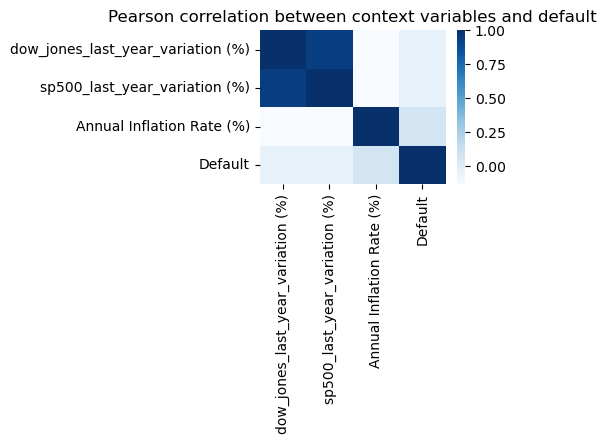

In [61]:
plt.figure(figsize=(3,2))
sns.heatmap(economic_correlation, cmap="Blues")
plt.title('Pearson correlation between context variables and default');
plt.show()

In [62]:
economic_correlation = loans[['dow_jones_last_year_variation (%)','sp500_last_year_variation (%)', 
                              'Annual Inflation Rate (%)', 'Default']].corr(method='spearman') 
economic_correlation

,dow_jones_last_year_variation (%),sp500_last_year_variation (%),Annual Inflation Rate (%),Default
dow_jones_last_year_variation (%),1.000000,0.920254,-0.199377,-0.041708
sp500_last_year_variation (%),0.920254,1.000000,-0.212086,-0.044097
Annual Inflation Rate (%),-0.199377,-0.212086,1.000000,0.068727
Default,-0.041708,-0.044097,0.068727,1.000000


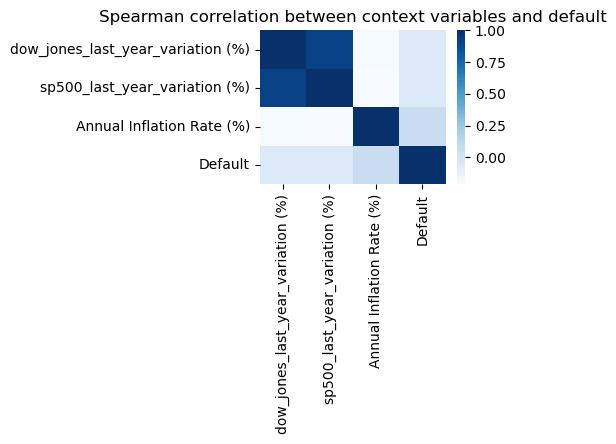

In [63]:
plt.figure(figsize=(3,2))
sns.heatmap(economic_correlation, cmap="Blues")
plt.title('Spearman correlation between context variables and default');
plt.show()

We see that the correlations with the default field are low. We conclude that these new variables do not seem to provide useful information for a predictive model. 

### Waiting days

Now let's go back to what we considered before: How does waiting time affect payments?

In [64]:
loans.groupby(['Days_waiting']).agg(Number_of_loans=('DisbursementGross', 'count'), 
    MeanDisbursed=('DisbursementGross', 'mean'), AverageAmountApproved=('GrAppv', 'mean'), MeanTerm=('Term', 'mean'),
    Default_rate= ('Default', 'mean')).sort_values(by='Number_of_loans', ascending=False).head(10)

,Number_of_loans,MeanDisbursed,AverageAmountApproved,MeanTerm,Default_rate
Days_waiting,,,,,
0 days,15106,181915.612737,157502.507480,80.908646,0.171786
31 days,11083,173519.124244,159235.820085,92.527204,0.255166
32 days,10727,171832.183462,158660.796122,94.537522,0.231938
35 days,10505,180819.479010,165867.533175,94.323465,0.234079
34 days,10315,177332.838391,163334.082792,93.811246,0.237130
28 days,10229,152428.638772,137913.120833,88.850230,0.284192
33 days,10134,176146.676830,163218.133314,93.703769,0.234952
25 days,9830,151334.059919,138320.286572,89.257070,0.282503
26 days,9685,154410.825194,139799.854724,88.649768,0.288074


In [65]:
loans['Days_waiting']=loans['Days_waiting'].dt.days #We convert to int to make it easier to work with this field.

There are also strange things, such as loans that were delivered several years before being approved:

In [66]:
loans[loans['Days_waiting']<0][['ApprovalDate', 'ApprovalFY', 'Days_waiting', 'Term', 'NoEmp', 'NewExist', 
        'CreateJob', 'RetainedJob','UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementDate', 'DisbursementGross', 
        'GrAppv','SBA_Appv', 'Sector', 'Subsector', 'Is_franchise', 'Default', 'SameState', 'Several_loans', 
        'Ratio_approved-guaranteed', 'Disb_vs_GrAppv', 'Disb_vs_GrAppv_is_positive', 'Real_Estate','DisbursementYear',
        'ApprovalYear', 'GreatRecession', 'dow_jones_last_year_variation (%)', 'sp500_last_year_variation (%)',
       'Annual Inflation Rate (%)']].sort_values(by='Days_waiting').head(8)

,ApprovalDate,ApprovalFY,Days_waiting,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,Sector,Subsector,Is_franchise,Default,SameState,Several_loans,Ratio_approved-guaranteed,Disb_vs_GrAppv,Disb_vs_GrAppv_is_positive,Real_Estate,DisbursementYear,ApprovalYear,GreatRecession,dow_jones_last_year_variation (%),sp500_last_year_variation (%),Annual Inflation Rate (%)
898373,1997-02-21,1997,-3614.0,299,1,1.0,0,0,0,0.0,0.0,1987-04-01,50000.0,50000.0,37500.0,44,8,0,0,True,True,1.333333,0.0,0.0,1,1987,1997,0,21.737901,20.771200,3.0
896097,2007-01-29,2007,-3530.0,84,2,2.0,0,0,0,NaN,0.0,1997-05-31,60000.0,60000.0,48000.0,0,,1,0,False,False,1.250000,0.0,0.0,0,1997,2007,1,11.525518,11.210966,2.5
899107,2001-03-26,2001,-1150.0,84,21,1.0,0,0,0,0.0,0.0,1998-01-31,100000.0,100000.0,75000.0,0,,0,0,True,False,1.333333,0.0,0.0,0,1998,2001,0,-8.852071,-19.199495,3.5
296330,1999-07-06,1999,-669.0,70,5,2.0,0,0,2,0.0,0.0,1997-09-05,180000.0,180000.0,135000.0,62,4,0,0,True,False,1.333333,0.0,0.0,0,1997,1999,0,16.747853,9.325037,2.0
696091,2004-03-01,2004,-602.0,24,30,1.0,0,0,1,0.0,0.0,2002-07-08,746000.0,746000.0,559500.0,33,3,0,0,True,False,1.333333,0.0,0.0,0,2002,2004,0,11.597269,12.637630,1.7
30748,1997-05-13,1997,-567.0,103,2,1.0,0,0,0,0.0,1.0,1995-10-24,50000.0,50000.0,40000.0,23,5,0,0,True,True,1.250000,0.0,0.0,0,1995,1997,0,15.225907,13.208316,2.5
896105,1997-01-29,1997,-463.0,253,1,2.0,0,0,0,0.0,1.0,1995-10-24,100000.0,100000.0,80000.0,0,,0,0,True,False,1.250000,0.0,0.0,1,1995,1997,0,18.678376,16.603774,3.3
441034,2001-02-07,2001,-357.0,40,1,2.0,0,0,2,0.0,1.0,2000-02-16,45000.0,45000.0,38250.0,72,2,0,1,True,False,1.176471,0.0,0.0,0,2000,2001,0,-0.735233,-8.893871,3.7


In [67]:
print(f"There are {len(loans[loans['Days_waiting']<0])} that were delivered before being approved.")

There are 806 that were delivered before being approved.


Proportionally they are few. Let's see a histogram of the days of waiting.

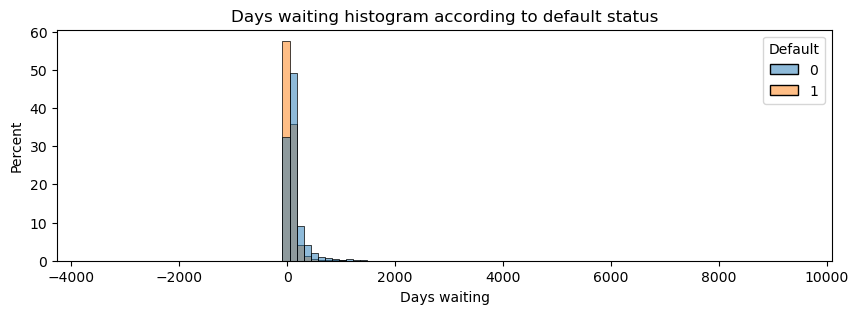

In [68]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.histplot(data=loans, x='Days_waiting', bins=100, stat='percent', hue='Default', common_norm=False);
ax.set(xlabel='Days waiting', title='Days waiting histogram according to default status');
plt.show()

Contrary to what one might think, loans that defaulted were delivered faster on average. Let's look at it in more detail.

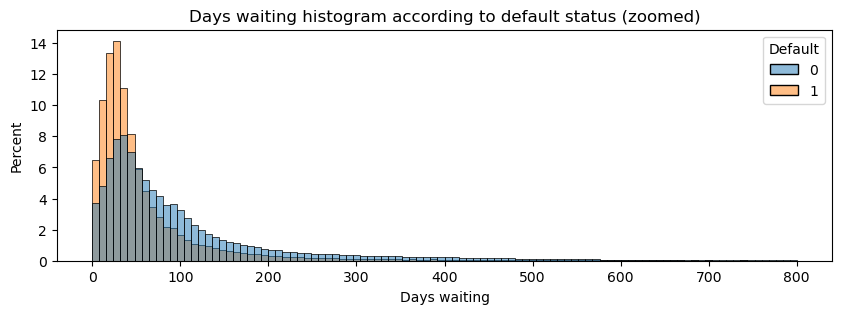

In [69]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.histplot(data=loans[loans['Days_waiting'].between(0, 800, inclusive='both')], x='Days_waiting', bins=100, stat='percent', hue='Default', common_norm=False);
ax.set(xlabel='Days waiting', title='Days waiting histogram according to default status (zoomed)');
plt.show()

In the last graph it is seen more clearly. 

In [70]:
print(loans[loans['Default']==1].groupby(['Days_waiting']).agg(Number_of_loans=('DisbursementGross', 'count'), 
    MeanDisbursed=('DisbursementGross', 'mean'), AverageAmountApproved=('GrAppv', 'mean'), 
    MeanTerm=('Term', 'mean')).sort_values(by='Number_of_loans', ascending=False).head(5))
print('----------------------------------------------------------------------------------')
print(loans[loans['Default']==0].groupby(['Days_waiting']).agg(Number_of_loans=('DisbursementGross', 'count'), 
    MeanDisbursed=('DisbursementGross', 'mean'), AverageAmountApproved=('GrAppv', 'mean'), 
    MeanTerm=('Term', 'mean')).sort_values(by='Number_of_loans', ascending=False).head(5))

              Number_of_loans  MeanDisbursed  AverageAmountApproved   MeanTerm
Days_waiting                                                                  
21.0                     2961  103990.493752           87758.151638  53.919622
28.0                     2907  110284.724114           94171.981768  53.067079
23.0                     2894   97600.005183           82145.756393  51.263303
29.0                     2856  108213.911064           93744.174370  53.165966
22.0                     2841  101987.332629           85473.529039  52.782471
----------------------------------------------------------------------------------
              Number_of_loans  MeanDisbursed  AverageAmountApproved  \
Days_waiting                                                          
0.0                     12511  209197.997842          181065.023020   
31.0                     8255  192122.748637          178701.578316   
32.0                     8239  185176.361573          173314.392766   
35.0     

The most common average waiting period for loans that defaulted was 21 days, while for those that did not default it was 0; but in the latter case, after 0, the most common wait was 31 days.

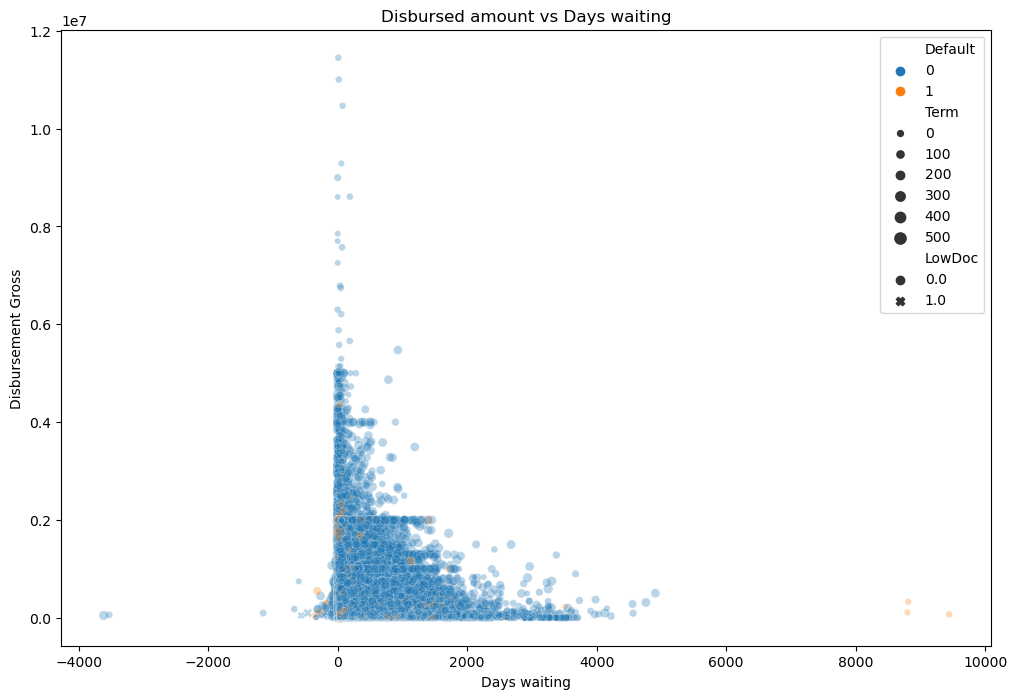

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
ax=sns.scatterplot(data = loans, x='Days_waiting', y='DisbursementGross', hue='Default', size='Term', style='LowDoc',
                   alpha=0.3);
plt.legend(loc='upper right');
ax.set(xlabel='Days waiting', ylabel='Disbursement Gross',title = 'Disbursed amount vs Days waiting') ;
plt.show()

In this graph we cannot see much, let's make a similar one but grouping the data in averages.

In [72]:
aux=loans.groupby(['Default', 'Days_waiting']).agg(Number_of_loans=('DisbursementGross', 'count'), 
    MeanDisbursed=('DisbursementGross', 'mean'), AverageAmountApproved=('GrAppv', 'mean'), 
    MeanTerm=('Term', 'mean'), Franchise_proportion=('Is_franchise', 'mean'), 
    RevLine_proportion=('RevLineCr', 'mean'), LowDoc_proportion=('LowDoc', 'mean')).sort_values(by='Number_of_loans', ascending=False).reset_index()
aux

,Default,Days_waiting,Number_of_loans,MeanDisbursed,AverageAmountApproved,MeanTerm,Franchise_proportion,RevLine_proportion,LowDoc_proportion
0,0,0.0,12511,209197.997842,181065.023020,83.866677,0.033251,0.366975,0.004829
1,0,31.0,8255,192122.748637,178701.578316,106.379528,0.044579,0.450765,0.098345
2,0,32.0,8239,185176.361573,173314.392766,107.559170,0.043816,0.423024,0.126750
3,0,35.0,8046,194100.404176,179665.725205,106.541760,0.042133,0.429984,0.110376
4,0,34.0,7869,191906.918795,179604.308807,106.650909,0.048291,0.416207,0.114070
...,...,...,...,...,...,...,...,...,...
3684,0,2706.0,1,125000.000000,125000.000000,84.000000,0.000000,0.000000,0.000000
3685,0,2711.0,1,130000.000000,130000.000000,60.000000,1.000000,0.000000,0.000000
3686,0,2712.0,1,300000.000000,300000.000000,84.000000,0.000000,0.000000,0.000000
3687,0,2715.0,1,5000.000000,5000.000000,84.000000,0.000000,1.000000,0.000000


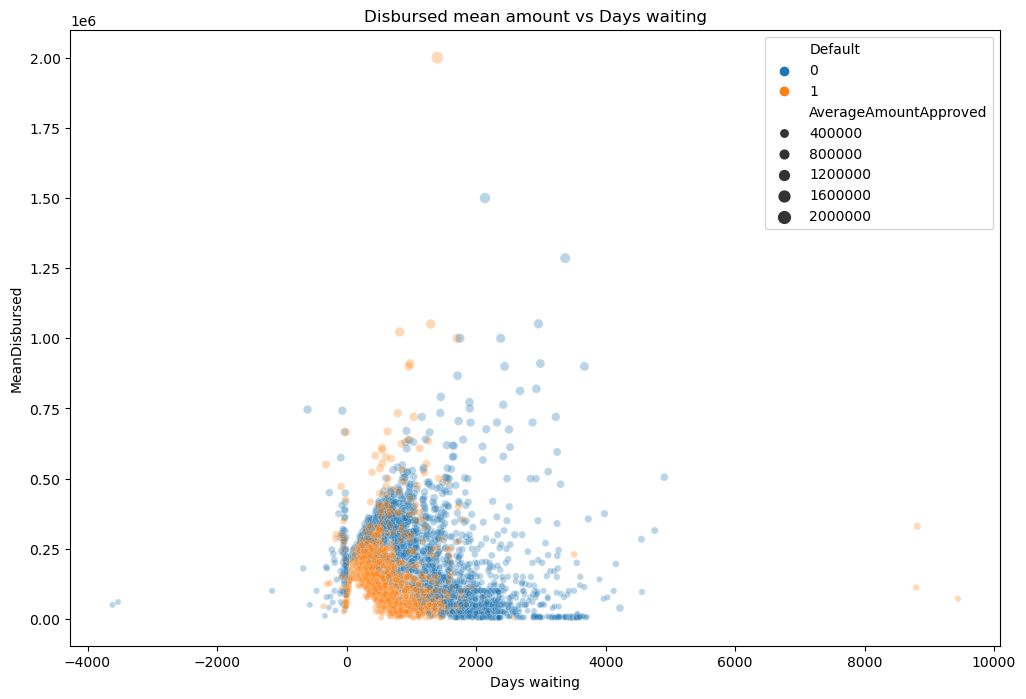

In [73]:
#Here we use that the variables RevLineCr, Is_franchise and LowDoc are binary. Otherwise, they would have to be
# converted (because this type of graph does not support string values) and it would be more tedious.
fig, ax = plt.subplots(figsize=(12, 8))
ax=sns.scatterplot(data = aux, x='Days_waiting', y='MeanDisbursed', hue='Default', size='AverageAmountApproved',
                   alpha=0.3);
plt.legend(loc='upper right');
ax.set(xlabel='Days waiting', ylabel='MeanDisbursed',title = 'Disbursed mean amount vs Days waiting') ;
plt.show()

Here we can see that the loans that defaulted are separated from the loans that did not default with the averaged variables DisbursementGross and Days_waiting. In general terms, those who waited less defaulted more, and those who withdrew less also defaulted more.

Unfortunately, Days_waiting is not a piece of data that is taken before the loan is approved. In addition, for a matter of customer experience, Days_waiting is a variable that should be as low as possible regardless of what the model says or not.

### More observations and insights

* The Industry column has zeros, inherited from the NAICS column. In those same rows, the Subsector column has empty strings. These cases are more than 22% of all records in the dataset.

* There is no correlation between the default rate and the amount of loans a bank has.

* The state of the bank branch is related to the default rate, but it is even more important whether the state where the bank branch is located is the same as the state of the company or not.

* The business sector has a notorious relationship with the default rate. The subsector has a weaker relationship and the differences of default rate between subsectors are not consistent for different sectors. Therefore, we do not believe that adding the subsector field would enrich the model and therefore we will not take it into account in the model.

* There is a small difference in the default rate between loans from companies that took several and those that took only one.

* More than 50% of the loans that defaulted have the ratio Mount_approved_by_bank-Mount_guaranteed_by_SBA around 2.

* There are 806 loans that were delivered before being approved. Some nearly 10 years earlier, though they are proportionately few.

* Contrary to what one might think, loans that defaulted were delivered faster on average. The most common average waiting period for loans that defaulted was 21 days, while for those that did not default it was 0; but in the latter case, after 0, the most common wait was 31 days.

* The loans that defaulted are separated from the loans that did not default with the averaged variables DisbursementGross and Days_waiting. In any case,'Days_waiting' is not a variable that can be used to predict before approving a loan.

## More training alternatives

How much did adding the bank class column influence the machine learning model? Let's try throwing it away and see how the model works.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score as bas

In [75]:
# These files are from the main file.
y_train=pd.read_pickle(path +'y_train.pkl')
y_last_years_train=pd.read_pickle(path +'y_last_years_train.pkl')
y_test=pd.read_pickle(path +'y_test.pkl')
y_last_years_test= pd.read_pickle(path +'y_last_years_test.pkl') 
X_train_enc = pd.read_pickle(path +'X_train_enc.pkl')  
X_last_years_train_enc = pd.read_pickle(path +'X_last_years_train_enc.pkl') 
X_test_enc = pd.read_pickle(path +'X_test_enc.pkl') 
X_last_years_test_enc = pd.read_pickle(path +'X_last_years_test_enc.pkl') 

In [76]:
X_train_enc.head()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,SBA_Appv,Is_franchise,Real_Estate,SameState_False,SameState_True,SameState_Unknown,State,BankState,Sector,BankClass
449021,-1.214379,0.246927,-0.618772,-0.014571,0.080842,1.921573,1.495828,-0.340305,-0.546215,-0.246813,-0.45152,-0.942561,0.945827,-0.041553,-0.119935,-0.200298,0.680219,1.423052
725091,-0.339847,-0.125892,1.591161,-0.035661,-0.037130,0.374855,-1.262886,-0.340305,-0.637061,-0.246813,-0.45152,1.060939,-1.057276,-0.041553,0.208100,-1.458607,1.171656,1.423052
743319,-0.644032,-0.139207,-0.618772,-0.031443,-0.041343,0.374855,-1.262886,-0.340305,-0.589996,-0.246813,-0.45152,-0.942561,0.945827,-0.041553,-1.300858,-1.458607,-0.179795,-0.592312
136039,-0.339847,-0.112577,1.591161,-0.031443,-0.045557,0.374855,1.495828,-0.340305,-0.600942,-0.246813,-0.45152,1.060939,-1.057276,-0.041553,1.257809,-0.703621,-0.671232,1.423052
80364,-0.339847,-0.072632,-0.618772,-0.031443,-0.016063,0.374855,0.116471,-0.340305,-0.436763,-0.246813,-0.45152,1.060939,-1.057276,-0.041553,0.404920,0.932181,-0.302654,0.751264


In [77]:
X_train_enc.drop('BankClass', axis=1, inplace=True)

In [78]:
X_test_enc.drop('BankClass', axis=1, inplace=True)

In [79]:
X_last_years_train_enc.drop('BankClass', axis=1, inplace=True)

In [80]:
X_last_years_test_enc.drop('BankClass', axis=1, inplace=True)

In [81]:
dtc = tree.DecisionTreeClassifier(random_state=1234, max_depth=7)
dtc.fit(X_train_enc, y_train) 

DecisionTreeClassifier(max_depth=7, random_state=1234)

In [82]:
dtc_last_years= tree.DecisionTreeClassifier(random_state=1234, max_depth=7)
dtc_last_years.fit(X_last_years_train_enc, y_last_years_train) 

DecisionTreeClassifier(max_depth=7, random_state=1234)

In [83]:
from graphviz import Source

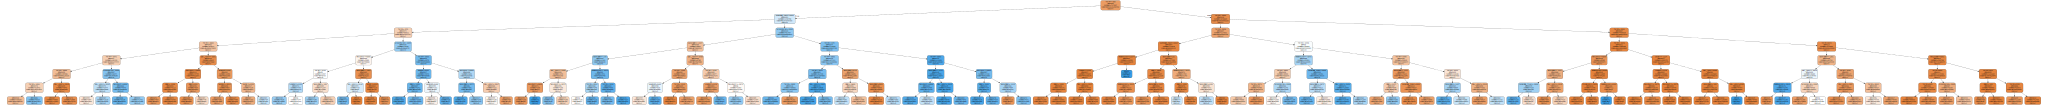

In [84]:
# The tree
from sklearn.tree import export_graphviz
import os

export_graphviz(
        dtc,
        out_file="dt_tree.dot",
        feature_names=X_train_enc.columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree.dot") 
#I don't know how to make the graph smaller!

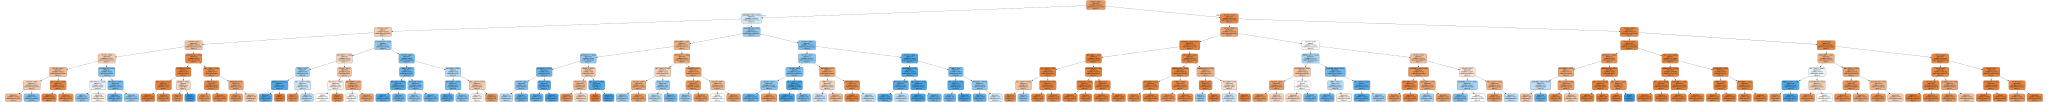

In [85]:
# The another tree
export_graphviz(
        dtc_last_years,
        out_file="dt_tree_last_years.dot",
        feature_names=X_last_years_train_enc.columns,
        class_names=['y', 'n'],
        rounded=True,
        filled=True
    )
Source.from_file("dt_tree_last_years.dot")

In [86]:
y_pred= dtc.predict(X_test_enc)

In [87]:
y_last_years_pred = dtc_last_years.predict(X_last_years_test_enc)

In [88]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred)}')

All years 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    147903
           1       0.81      0.70      0.75     31512

    accuracy                           0.92    179415
   macro avg       0.87      0.83      0.85    179415
weighted avg       0.92      0.92      0.92    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.95      0.96      0.95    143881
           1       0.81      0.73      0.77     29933

    accuracy                           0.92    173814
   macro avg       0.88      0.85      0.86    173814
weighted avg       0.92      0.92      0.92    173814



In [89]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.8337927005137302
Balanced accuracy score for test data of last years is: 0.849184151869019


                  Predicted Payed  Predicted Defaulted
Actual Payed               142646                 5257
Actual Defaulted             9355                22157
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               138739                 5142
Actual Defaulted             7959                21974


We see that the values of the metrics are very similar to those in the training with the bank class variable.

Let's predict with the training sets to see if there is overfitting.

In [90]:
control_overfitting_dtc= dtc.predict(X_train_enc)
control_overfitting_last_years_dtc= dtc_last_years.predict(X_last_years_train_enc) 

In [91]:
print(f'All years \n {classification_report(y_train,control_overfitting_dtc)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_dtc)}')

All years 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95    591612
           1       0.81      0.70      0.75    126045

    accuracy                           0.92    717657
   macro avg       0.87      0.83      0.85    717657
weighted avg       0.92      0.92      0.92    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.95      0.96      0.95    575520
           1       0.81      0.73      0.77    119734

    accuracy                           0.92    695254
   macro avg       0.88      0.85      0.86    695254
weighted avg       0.92      0.92      0.92    695254



In [92]:
print('Balanced accuracy score for test data of all years is:', bas(y_train,control_overfitting_dtc))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_train,control_overfitting_last_years_dtc))

Balanced accuracy score for test data of all years is: 0.8333584429842065
Balanced accuracy score for test data of last years is: 0.8475136196136215


The values are very similar to those of the test, so we understand that there is no overfitting.

### Logistic regression

In [93]:
log_reg = LogisticRegression()
log_reg_last_years = LogisticRegression()

We train and create the predictions:

In [94]:
log_reg.fit(X_train_enc, y_train)
log_reg_last_years.fit(X_last_years_train_enc, y_last_years_train)

LogisticRegression()

In [95]:
y_pred = log_reg.predict(X_test_enc)
y_last_years_pred=log_reg_last_years.predict(X_last_years_test_enc)

In [96]:
print(f'All years \n {classification_report(y_true=y_test,y_pred=y_pred)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_true=y_last_years_test,y_pred=y_last_years_pred)}')

All years 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91    147903
           1       0.68      0.28      0.39     31512

    accuracy                           0.85    179415
   macro avg       0.77      0.62      0.65    179415
weighted avg       0.83      0.85      0.82    179415
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.87      0.97      0.92    143881
           1       0.68      0.32      0.44     29933

    accuracy                           0.86    173814
   macro avg       0.78      0.65      0.68    173814
weighted avg       0.84      0.86      0.84    173814



In [97]:
#Balamced accuracy
print('Balanced accuracy score for test data of all years is:', bas(y_test,y_pred))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_test,y_last_years_pred))
confusionmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

confusionmatrix_last_years = pd.DataFrame(confusion_matrix(y_last_years_test, y_last_years_pred))

confusionmatrix.index = ['Actual Payed','Actual Defaulted']
confusionmatrix.columns = ['Predicted Payed','Predicted Defaulted']

confusionmatrix_last_years.index = ['Actual Payed','Actual Defaulted']
confusionmatrix_last_years.columns = ['Predicted Payed','Predicted Defaulted']

print('\n')
print(confusionmatrix)
print('---------------------------------------------------------\n Last years \n')
print(confusionmatrix_last_years)

Balanced accuracy score for test data of all years is: 0.6242538069235071
Balanced accuracy score for test data of last years is: 0.6467749163444056


                  Predicted Payed  Predicted Defaulted
Actual Payed               143735                 4168
Actual Defaulted            22793                 8719
---------------------------------------------------------
 Last years 

                  Predicted Payed  Predicted Defaulted
Actual Payed               139357                 4524
Actual Defaulted            20205                 9728


In this case, the model has a slightly lower performance than when it had the 'BankClass' variable.

Let's predict with the training sets to see if there is overfitting.

In [98]:
control_overfitting_lr= log_reg.predict(X_train_enc)
control_overfitting_last_years_lr= log_reg_last_years.predict(X_last_years_train_enc) 

In [99]:
print(f'All years \n {classification_report(y_train,control_overfitting_lr)}\
    \n--------------------------------------------------------------------------\n Last years \n\
      {classification_report(y_last_years_train,control_overfitting_last_years_lr)}')

All years 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91    591612
           1       0.68      0.28      0.40    126045

    accuracy                           0.85    717657
   macro avg       0.77      0.63      0.66    717657
weighted avg       0.83      0.85      0.82    717657
    
--------------------------------------------------------------------------
 Last years 
                    precision    recall  f1-score   support

           0       0.87      0.97      0.92    575520
           1       0.68      0.32      0.44    119734

    accuracy                           0.86    695254
   macro avg       0.78      0.65      0.68    695254
weighted avg       0.84      0.86      0.84    695254



In [100]:
print('Balanced accuracy score for test data of all years is:', bas(y_train,control_overfitting_lr))
print('Balanced accuracy score for test data of last years is:', bas(y_last_years_train,control_overfitting_last_years_lr))

Balanced accuracy score for test data of all years is: 0.6263073089652439
Balanced accuracy score for test data of last years is: 0.6455166571183489


In this case, unlike when we had the 'BankClass' variable, we did not find overfitting.